# What this file does

I want to examine the role of the age of a building on how accessible it is. This file wrangles the data for that analysis to continue in a subsequent jupyter notebook. The final product — used for mapping, correlation analysis and regression — year_built_school.csv. It contains the year built for most of the rated building in the DOE dataset, in addition to other information from the pluto dataset (subsequent alterations, historical district etc)

I work with three datasets in this file:

1. 2017-2018 School_Locations.csv (https://data.cityofnewyork.us/Education/2017-2018-School-Locations/p6h4-mpyy), because I want to combine DOE Building Codes with Borough Block and Lot codes
2. School-NYC-Accessibility-geolocated.csv (https://github.com/kpananjady/Accessibility-NYC-Schools/blob/master/School-NYC-Accessibility-geolocated.csv), because I'm only interested in the codes that have been rated already by the DOE
3. pluto_20v1.csv (https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page), to get the year buildings were built and whether or not they're landmarks/located in historic districts


I start by combining school locations and accessibility ratings on DOE building codes, and then combine the resulting file on the Pluto database on borough, block and lot codes. This gives me the year built for most of the rated building in the DOE dataset. 

I then try to get year built for every single school location — whether or not they've been rated so far. I plot the distribution of construction years for all buildings, and then another histogram for all

# Findings

For the most part, this worked successfully — I lost 20 of the buildings in the Ratings database when I combined it with the locations file with the DOE building codes. (645-625-20) I then lose 9 more buildings when I combine it with Pluto database on borough, block and lot codes, leaving me with 616 buildings perfectly combined across all three datasets. That's 95 percent of rated schools.

If you have ideas about how to go about finding the 29 buildings in the original accessibility dataset that I couldn't combine, let me know.

It's interesting to see just how few — relatively speaking — schools were constructed after the 1991 Americans with Disabilities Act was put in place in 1992.

In [ ]:
#import pandas

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
!ls

2017_-_2018_School_Locations.csv        building_code_bbl.csv
Joins.ipynb                             pluto_20v1.csv
School-NYC-Accessibility-geolocated.csv year_built_school.csv
age-doe.qgz


# School_Locations.csv

In [ ]:
#read in; from https://data.cityofnewyork.us/Education/2017-2018-School-Locations/p6h4-mpyy

In [112]:
df_school_locs = pd.read_csv('2017_-_2018_School_Locations.csv')

In [ ]:
#fields ; intersted in building code for merges

In [113]:
df_school_locs.dtypes

FISCAL_YEAR                            int64
ATS SYSTEM CODE                       object
LOCATION_CODE                         object
LOCATION_NAME                         object
BEDS NUMBER                            int64
MANAGED_BY_NAME                       object
LOCATION_TYPE_DESCRIPTION             object
LOCATION_CATEGORY_DESCRIPTION         object
GRADES_TEXT                           object
GRADES_FINAL_TEXT                     object
OPEN_DATE                             object
STATUS_DESCRIPTIONS                   object
PRIMARY_BUILDING_CODE                 object
PRIMARY_ADDRESS_LINE_1                object
STATE_CODE                            object
X_COORDINATE                         float64
Y_COORDINATE                         float64
COMMUNITY_DISTRICT                     int64
COUNCIL_DISTRICT                       int64
CENSUS_TRACT                          object
BOROUGH_BLOCK_LOT                      int64
NTA                                   object
NTA_NAME  

In [ ]:
#grab primary building code for merge with ratings and Borough Block Lot for merge w Pluto

In [114]:
df_school_locs[['PRIMARY_BUILDING_CODE', 'BOROUGH_BLOCK_LOT','CENSUS_TRACT']]

,PRIMARY_BUILDING_CODE,BOROUGH_BLOCK_LOT,CENSUS_TRACT
0,M015,1003740020,2601
1,M019,1004530034,4000
2,M020,1003550001,3001
3,M034,1003810038,2800
4,M063,1004310014,3200
...,...,...,...
1818,XABC,2028560029,21900
1819,X256,2023730014,14500
1820,X717,2028950068,16900
1821,X937,2049160001,48400


In [115]:
#buildings

In [116]:
len(df_school_locs['PRIMARY_BUILDING_CODE'].unique())

1307

In [117]:
#school codes

In [118]:
len(df_school_locs['LOCATION_CODE'].unique())

1823

In [ ]:
#all I want is primary building codes and the borough and lot nos; I also don't want the building codes to appear twice bc that esses up my merge

In [119]:
df_join_1 = df_school_locs.groupby('PRIMARY_BUILDING_CODE')['BOROUGH_BLOCK_LOT'].value_counts().to_frame().drop(['BOROUGH_BLOCK_LOT'], axis=1)

In [120]:
!ls

2017_-_2018_School_Locations.csv        building_code_bbl.csv
Joins.ipynb                             pluto_20v1.csv
School-NYC-Accessibility-geolocated.csv year_built_school.csv
age-doe.qgz


In [ ]:
df_join_1.to_csv('building_code_bbl.csv')

In [ ]:
df_final = pd.read_csv('building_code_bbl.csv')

# School-NYC-Accessibility-geolocated.csv

In [ ]:
# read in file; this is the geolocated version I created through my Accessibilty analysis https://github.com/kpananjady/Accessibility-NYC-Schools/blob/master/School-NYC-Accessibility-geolocated.csv

In [121]:
df_gelocated= pd.read_csv('School-NYC-Accessibility-geolocated.csv')

In [ ]:
#fields

In [122]:
df_gelocated.dtypes

Unnamed: 0                     int64
Geographic\n  District         int64
Borough                       object
Building Code                 object
School DBN                    object
Location Code                 object
School Name                   object
Grades Served                 object
Pre-K                         object
Address                       object
BAP Rating                    object
Accessibility Description     object
Rating                       float64
Address_Full                  object
Lat                          float64
Lng                          float64
dtype: object

In [ ]:
#I'm going to keep codes for join and ratings for regression analysis; lat and lng to make sure I plot in the same exact place

In [123]:
df_rated_schools = df_gelocated[['Building Code','Lat','Lng','Rating']]

In [ ]:
#quick view 

In [124]:
df_rated_schools

,Building Code,Lat,Lng,Rating
0,X040,40.809141,-73.920138,1.0
1,X040,40.809141,-73.920138,1.0
2,X040,40.809141,-73.920138,1.0
3,X065,40.807662,-73.912743,6.0
4,X065,40.807662,-73.912743,6.0
...,...,...,...,...
1196,R861,40.620452,-74.164416,10.0
1197,R861,40.620452,-74.164416,10.0
1198,R880,40.608634,-74.105093,4.0
1199,R880,40.608634,-74.105093,4.0


In [ ]:
#write over df final w ratigns, and all the 

In [145]:
df_final = df_rated_schools.merge(df_final, left_on='Building Code', right_on='PRIMARY_BUILDING_CODE')

In [146]:
df_final

,Building Code,Lat,Lng,Rating,PRIMARY_BUILDING_CODE,BOROUGH_BLOCK_LOT
0,X040,40.809141,-73.920138,1.0,X040,2022840034
1,X040,40.809141,-73.920138,1.0,X040,2022840034
2,X040,40.809141,-73.920138,1.0,X040,2022840034
3,X065,40.807662,-73.912743,6.0,X065,2025710001
4,X065,40.807662,-73.912743,6.0,X065,2025710001
...,...,...,...,...,...,...
1172,R861,40.620452,-74.164416,10.0,R861,5016530001
1173,R861,40.620452,-74.164416,10.0,R861,5016530001
1174,R880,40.608634,-74.105093,4.0,R880,5006830001
1175,R880,40.608634,-74.105093,4.0,R880,5006830001


In [ ]:
#note: there were 1201 schools in geolocated database; looks like we lost about 23 schools here? 

In [164]:
df_final['PRIMARY_BUILDING_CODE'].nunique()

625

In [166]:
df_rated_schools['Building Code'].nunique()

645

In [ ]:
#we've lost 20 buildings that didn't match on location code

# Pluto

In [ ]:
#read in pluto from https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page

In [130]:
df_pluto = pd.read_csv('pluto_20v1.csv')

In [ ]:
#data dictionary https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?v=20v1

In [134]:
df_pluto.dtypes.head(50)

borough        object
block           int64
lot             int64
cd            float64
ct2010        float64
cb2010        float64
schooldist    float64
council       float64
zipcode       float64
firecomp       object
policeprct    float64
healtharea    float64
sanitboro     float64
sanitsub       object
address        object
zonedist1      object
zonedist2      object
zonedist3      object
zonedist4      object
overlay1       object
overlay2       object
spdist1        object
spdist2        object
spdist3       float64
ltdheight      object
splitzone      object
bldgclass      object
landuse       float64
easements     float64
ownertype      object
ownername      object
lotarea       float64
bldgarea      float64
comarea       float64
resarea       float64
officearea    float64
retailarea    float64
garagearea    float64
strgearea     float64
factryarea    float64
otherarea     float64
areasource    float64
numbldgs      float64
numfloors     float64
unitsres      float64
unitstotal

In [135]:
df_pluto.dtypes.tail(50)

bldgdepth               float64
ext                      object
proxcode                float64
irrlotcode               object
lottype                 float64
bsmtcode                float64
assessland              float64
assesstot               float64
exempttot               float64
yearbuilt               float64
yearalter1              float64
yearalter2              float64
histdist                 object
landmark                 object
builtfar                float64
residfar                float64
commfar                 float64
facilfar                float64
borocode                  int64
bbl                       int64
condono                 float64
tract2010               float64
xcoord                  float64
ycoord                  float64
latitude                float64
longitude               float64
zonemap                  object
zmcode                   object
sanborn                  object
taxmap                  float64
edesignum               float64
appbbl  

In [ ]:
#pull out landmark status, borough block lot no, years altered, historical district status, coords

In [136]:
df_pluto_selected = df_pluto[['landmark','bbl','yearbuilt','yearalter1','yearalter2', 'histdist','xcoord','ycoord']]

In [ ]:
#quick view

In [137]:
df_pluto_selected

,landmark,bbl,yearbuilt,yearalter1,yearalter2,histdist,xcoord,ycoord
0,NaN,3008340046,1931.0,0.0,0.0,NaN,982211.0,171707.0
1,NaN,4040420106,1910.0,0.0,0.0,NaN,1026895.0,225880.0
2,NaN,3046790017,1920.0,0.0,0.0,NaN,1004527.0,177269.0
3,NaN,3078310006,1920.0,0.0,0.0,NaN,1004804.0,166580.0
4,NaN,3078310007,1920.0,0.0,0.0,NaN,1004784.0,166579.0
...,...,...,...,...,...,...,...,...
859167,NaN,2046560045,1920.0,0.0,0.0,NaN,1022358.0,261858.0
859168,NaN,4086200038,1935.0,0.0,0.0,NaN,1063503.0,206551.0
859169,NaN,3025750023,1901.0,2010.0,2018.0,NaN,997519.0,204933.0
859170,NaN,1020230046,1891.0,0.0,0.0,St. Nicholas Historic District,999843.0,237139.0


In [ ]:
#distribution of years built for all buildings in the city that aren't zero

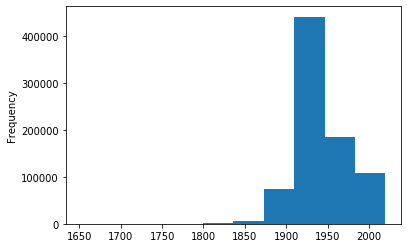

In [170]:
df_pluto_selected['yearbuilt'][df_pluto_selected['yearbuilt']!=0.0].plot(kind='hist')

In [ ]:
#combine with pluto on borough block and lot numbers; save progress

In [148]:
df_pluto_selected.merge(df_final, left_on='bbl',right_on='BOROUGH_BLOCK_LOT').to_csv('year_built_school.csv')

In [ ]:
#read the file back in 

In [149]:
df_real = pd.read_csv('year_built_school.csv')

In [ ]:
#we've got 616 buildings combined successfully

In [167]:
df_real['Building Code'].nunique()

616

# Distributions

School Builings

In [176]:
df_school_locs

,FISCAL_YEAR,ATS SYSTEM CODE,LOCATION_CODE,LOCATION_NAME,BEDS NUMBER,MANAGED_BY_NAME,LOCATION_TYPE_DESCRIPTION,LOCATION_CATEGORY_DESCRIPTION,GRADES_TEXT,GRADES_FINAL_TEXT,...,ADMINISTRATIVE_DISTRICT_NAME,COMMUNITY_SCHOOL_SUP_NAME,FIELD_SUPPORT_CENTER_NAME,FIELD_SUPPORT_CENTER_LEADER_NAME,SCHOOL_SUPPORT_TEAM_NAME,SCHOOL_SUPPORT_TEAM_LEADER_NAME,HIGHSCHOOL_NETWORK_LOCATION_CODE,HIGHSCHOOL_NETWORK_NAME,HIGHSCHOOL_NETWORK_SUPERINTENDENT,Location 1
0,2018,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"333 EAST 4 STREET\nMANHATTAN, NY 10009\n(40.72..."
1,2018,01M019,M019,P.S. 019 Asher Levy,310100010019,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"185 1 AVENUE\nMANHATTAN, NY 10003\n(40.730009,..."
2,2018,01M020,M020,P.S. 020 Anna Silver,310100010020,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"166 ESSEX STREET\nMANHATTAN, NY 10002\n(40.721..."
3,2018,01M034,M034,P.S. 034 Franklin D. Roosevelt,310100010034,DOE,General Academic,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE","PK,0K,01,02,03,04,05,06,07,08",...,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"730 EAST 12 STREET\nMANHATTAN, NY 10009\n(40.7..."
4,2018,01M063,M063,The STAR Academy - P.S.63,310100010063,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,COMMUNITY SCHOOL DISTRICT 01,"PHILLIPS, DANIELLA",Field Support Center - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NaN,NaN,NaN,NaN,"121 EAST 3 STREET\nMANHATTAN, NY 10009\n(40.72..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,2018,84X705,X705,Family Life Academy Charter School,320900860839,Charter,General Academic,K-8,"0K,01,02,03,04,05","0K,01,02,03,04,05",...,OFFICE OF CHARTER SCHOOLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"14 WEST 170 STREET\nBRONX, NY 10452\n(40.84026..."
1819,2018,84X706,X706,Harriet Tubman Charter School,320900860823,Charter,General Academic,K-8,"0K,01,02,03,04,05,06,07,08","0K,01,02,03,04,05,06,07,08",...,OFFICE OF CHARTER SCHOOLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3565 THIRD AVENUE\nBRONX, NY 10456\n(40.832328..."
1820,2018,84X717,X717,Icahn Charter School,320900860835,Charter,General Academic,K-8,"0K,01,02,03,04,05,06,07,08","0K,01,02,03,04,05,06,07,08",...,OFFICE OF CHARTER SCHOOLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1506-30 BROOK AVENUE\nBRONX, NY 10457\n(40.838..."
1821,2018,84X718,X718,Bronx Charter School for Better Learning,321100860855,Charter,General Academic,Elementary,"PK,0K,01,02,03,04,05","0K,01,02,03,04,05",...,OFFICE OF CHARTER SCHOOLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3740 BAYCHESTER AVENUE\nBRONX, NY 10466\n(40.8..."


In [ ]:
#how many school buildings total

In [174]:
len(df_school_locs['PRIMARY_BUILDING_CODE'].unique())

1307

In [ ]:
#how many school buildings in the merge wih PLUTO? 96 percent 

In [177]:
df_pluto_selected.merge(df_school_locs, left_on='bbl',right_on='BOROUGH_BLOCK_LOT')['PRIMARY_BUILDING_CODE'].nunique()

1256

In [ ]:
#save

In [179]:
df_all_schools_years = df_pluto_selected.merge(df_school_locs, left_on='bbl',right_on='BOROUGH_BLOCK_LOT')

In [198]:
df_all_schools_years.to_csv('all_schools_years.csv')

In [ ]:
#distribution of years built for most of the schools in the database; red lines represent the different tenures of school building superintendents https://en.wikipedia.org/wiki/Superintendent_of_School_Buildings,_New_York_City

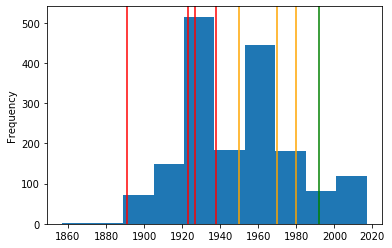

In [197]:
df_all_schools_years[df_all_schools_years['yearbuilt']!=0.0]['yearbuilt'].plot(kind='hist')
plt.axvline(x=1891, color='r')
plt.axvline(x=1923, color='r')
plt.axvline(x=1927, color='r')
plt.axvline(x=1938, color='r')
plt.axvline(x=1950, color='orange')
plt.axvline(x=1970, color='orange')
plt.axvline(x=1980, color='orange')
plt.axvline(x=1992, color='green')

In [ ]:
#red shows tenures of the school superintendents; orange is rough estimates; green is the passage of the ADA

In [ ]:
#year built distribution for most rated schools 

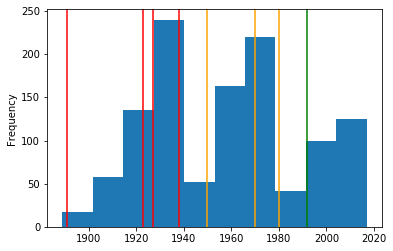

In [196]:
df_real[df_real['yearbuilt']!=0.0]['yearbuilt'].plot(kind='hist')
plt.axvline(x=1891, color='r')
plt.axvline(x=1923, color='r')
plt.axvline(x=1927, color='r')
plt.axvline(x=1938, color='r')
plt.axvline(x=1950, color='orange')
plt.axvline(x=1970, color='orange')
plt.axvline(x=1980, color='orange')
plt.axvline(x=1992, color='green')